# 0.0 - Intro


For this activity we need to borow a good rated notebook from Kaggle and use it to analyse other dataset. 

So I choose the Pokemon Notebook to analyse the FIFA Players info, all players have a set of habilities that can be used as attributes like Pokemons.

So, follow me in this journey!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

# custom libs
from libs.eda import *

# 1.0 - Load data and a few transformations

Since we borrowed the data from FIFA 18 and the notebook from Pokemon we need to fix some date before proceed.

In [2]:
df = pd.read_csv('data/CompleteDataset.csv',) #importing our dataset

/var/folders/0p/qrqq4ys102jbcx7c5bkmjnph0000gn/T/ipykernel_62509/2070481824.py:1: DtypeWarning:

Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
# lookint the dataset Columns
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [4]:
# selecting a few important columns, we wont use all because they do not fit well our analysis
# I choose to remove the Goal Keepr columns because they only relate to each other and we will not use them

df = df[['Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Preferred Positions']]

In [5]:
df.head() #checking the head of our data

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,88,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,58,...,55,25,11,61,44,10,83,70,11,GK


In [6]:
# ploting the info of our dataset to see Names,Non-Null Count and Dtypes, 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17981 non-null  object
 1   Age                  17981 non-null  int64 
 2   Nationality          17981 non-null  object
 3   Overall              17981 non-null  int64 
 4   Potential            17981 non-null  int64 
 5   Club                 17733 non-null  object
 6   Value                17981 non-null  object
 7   Wage                 17981 non-null  object
 8   Special              17981 non-null  int64 
 9   Acceleration         17981 non-null  object
 10  Aggression           17981 non-null  object
 11  Agility              17981 non-null  object
 12  Balance              17981 non-null  object
 13  Ball control         17981 non-null  object
 14  Composure            17981 non-null  object
 15  Crossing             17981 non-null  object
 16  Curv

# 1.1 - Numeric columns of Value and Wage

NOTE: 'Value' and 'Wage' aren't numeric but objects. 

Firstly we need to preprocess the data to make it usable for us. We will use short supporting function to convert values in those two columns into numbers. We will end up with two new columns 'ValueNum' and 'WageNum' that will contain numeric values.


In [7]:
# Supporting function for converting string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    

#dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
df['ValueNum'] = df['Value'].apply(lambda x: str2number(x))
df['WageNum'] = df['Wage'].apply(lambda x: str2number(x))



# 1.2 - Prefered Position

We will select the first prefered positon and store as the position in a new column.

And store the number of prefered positions in other column

In [8]:
df['Position'] = df['Preferred Positions'].str.split().str[0]
df['PositionNum'] = df['Preferred Positions'].apply(lambda x :len(x.split()))

# 1.3 - Inserting Continents

In [9]:
# List of countries for each continent
continents = {
    'Africa'             : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica'         : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia'               : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania'  : ['Australia','New Caledonia'],
    'Europe'             : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America'      : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America'      : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

# Function matching continent to countries
def find_continent(x, continents_list):
    # Iteration over 
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN

df['Continent'] = df['Nationality'].apply(lambda x: find_continent(x, continents))

In [10]:
# This columns have values like 23+4 that can't be used as  numbers, so we are going to remove the second value and keep the first.
columns_to_fix = ['Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy','Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']

# making the transformation mentioned above
for column in columns_to_fix:
    # print(column)
    # print(df[column].unique(), '\n\n')

    df[column] = df[column].astype(str)
    df[column] = df[column].str.replace('-','+')
    df[column] = df[column].str.split('+').str[0]
    df[column] = df[column].astype('int64')

# 2.0 - Pokemon(Soccer Players)

In [11]:
df['Position'].value_counts() #checking the value count of Nationality

CB     2705
ST     2277
GK     2029
CM     1977
CDM    1396
RM     1350
LM     1326
LB     1309
RB     1195
CAM    1125
RW      429
LW      427
CF      205
LWB     120
RWB     111
Name: Position, dtype: int64

In [12]:
df['PositionNum'].value_counts() #checking how many players has more than one prefered position

1    9738
2    5898
3    2001
4     344
Name: PositionNum, dtype: int64

In [13]:
df['Continent'].value_counts() #checking the number of players in Each Continent

Europe               10562
South America         3142
Asia                  1873
Africa                1185
North America          916
Australia Oceania      229
Antarctica              39
Name: Continent, dtype: int64

In [14]:
df.isnull().sum() #checking for null values in our data

Name                     0
Age                      0
Nationality              0
Overall                  0
Potential                0
Club                   248
Value                    0
Wage                     0
Special                  0
Acceleration             0
Aggression               0
Agility                  0
Balance                  0
Ball control             0
Composure                0
Crossing                 0
Curve                    0
Dribbling                0
Finishing                0
Free kick accuracy       0
Heading accuracy         0
Interceptions            0
Jumping                  0
Long passing             0
Long shots               0
Marking                  0
Penalties                0
Positioning              0
Reactions                0
Short passing            0
Shot power               0
Sliding tackle           0
Sprint speed             0
Stamina                  0
Standing tackle          0
Strength                 0
Vision                   0
V

In [15]:
df.describe().T #calling the describe method on our data

,count,mean,std,min,25%,50%,75%,max
Age,17981.0,2.514454e+01,4.614272e+00,16.0,21.0,25.0,28.0,47.0
Overall,17981.0,6.624798e+01,6.987965e+00,46.0,62.0,66.0,71.0,94.0
Potential,17981.0,7.119081e+01,6.102199e+00,46.0,67.0,71.0,75.0,94.0
Special,17981.0,1.594095e+03,2.721514e+02,728.0,1449.0,1633.0,1786.0,2291.0
Acceleration,17981.0,6.460058e+01,1.490705e+01,11.0,56.0,67.0,75.0,96.0
Aggression,17981.0,5.582226e+01,1.746844e+01,11.0,43.0,59.0,69.0,96.0
Agility,17981.0,6.334242e+01,1.479136e+01,14.0,55.0,65.0,74.0,96.0
Balance,17981.0,6.381553e+01,1.409438e+01,11.0,56.0,66.0,74.0,96.0
Ball control,17981.0,5.810984e+01,1.679913e+01,8.0,53.0,63.0,69.0,95.0
Composure,17981.0,5.789606e+01,1.292694e+01,5.0,51.0,60.0,67.0,96.0


In [16]:
df['Club'].fillna('No Club', inplace = True)
df['Continent'].fillna('Unknown', inplace = True)

In [17]:
df.isnull().sum() #no null values in our data set now

Name                   0
Age                    0
Nationality            0
Overall                0
Potential              0
Club                   0
Value                  0
Wage                   0
Special                0
Acceleration           0
Aggression             0
Agility                0
Balance                0
Ball control           0
Composure              0
Crossing               0
Curve                  0
Dribbling              0
Finishing              0
Free kick accuracy     0
Heading accuracy       0
Interceptions          0
Jumping                0
Long passing           0
Long shots             0
Marking                0
Penalties              0
Positioning            0
Reactions              0
Short passing          0
Shot power             0
Sliding tackle         0
Sprint speed           0
Stamina                0
Standing tackle        0
Strength               0
Vision                 0
Volleys                0
Preferred Positions    0
ValueNum               0


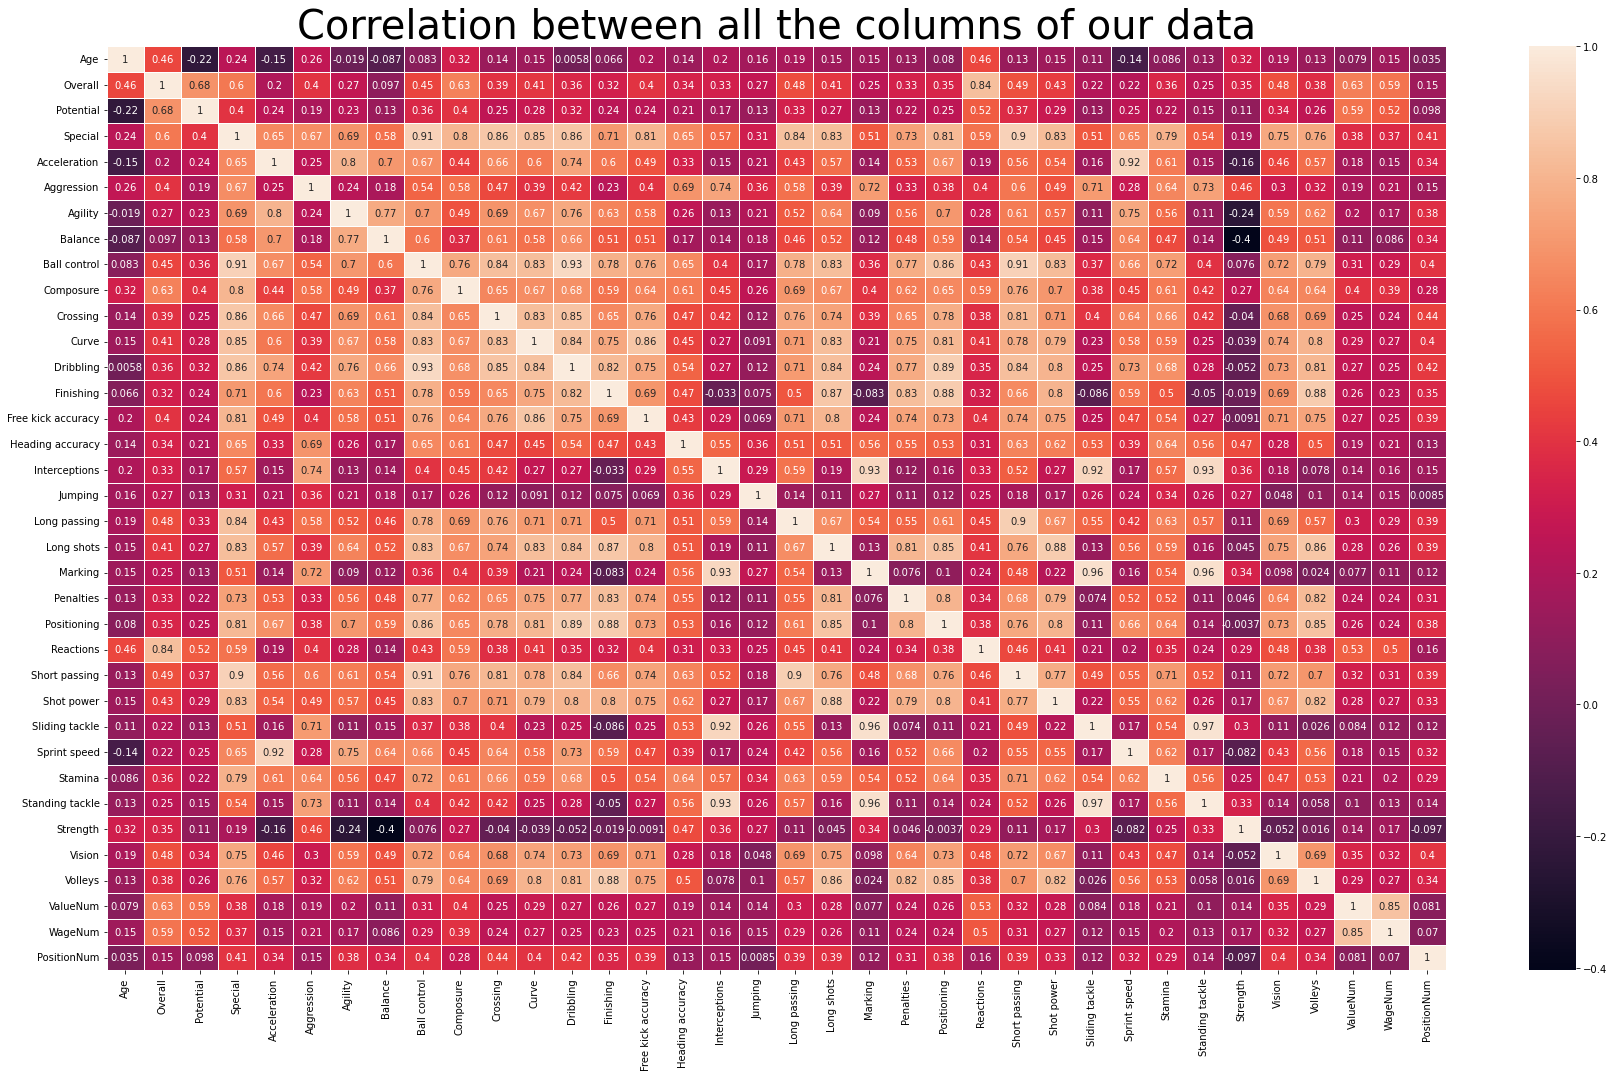

In [18]:
# plt.style.use('dark_background')
plt.figure(figsize=(30,17))
corr=sns.heatmap(df.corr(), annot = True, linewidths=1)
corr.set_title(label='Correlation between all the columns of our data', fontsize=40)
plt.show()

/Users/alexandrecolete/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



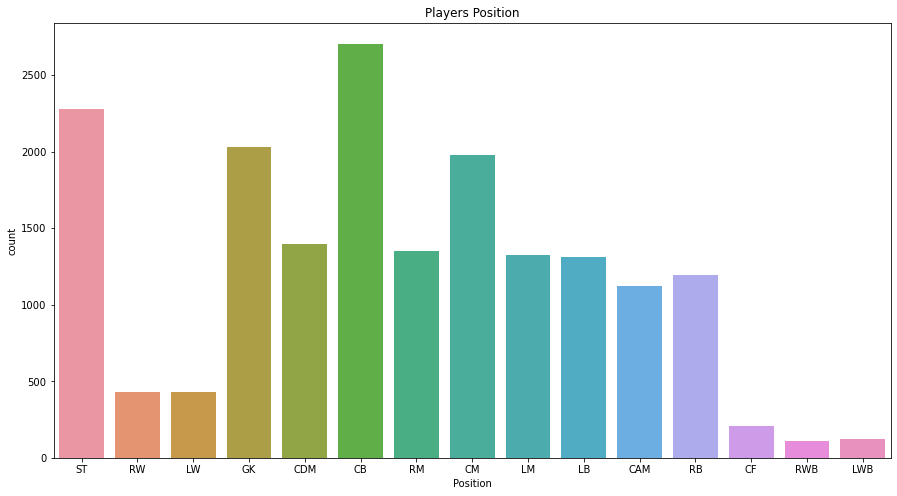

In [19]:
plt.figure(figsize=(15,8)) #count of Player Position 
sns.countplot(df['Position'])
plt.xlabel('Position')
plt.title('Players Position')
plt.show()

/Users/alexandrecolete/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



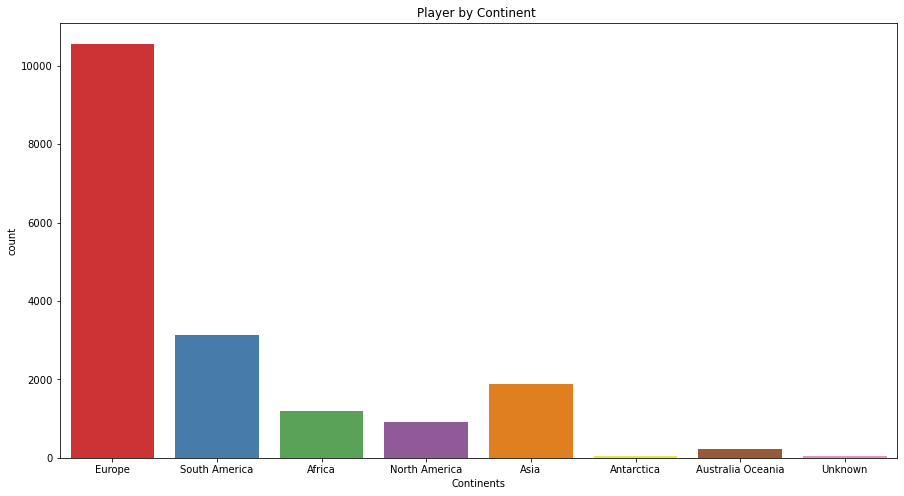

In [20]:
plt.figure(figsize=(15,8)) #count of type 2 pokemons
sns.countplot(df['Continent'],palette='Set1')
plt.xlabel('Continents')
plt.title('Player by Continent ')
plt.show()

<Figure size 1080x576 with 0 Axes>

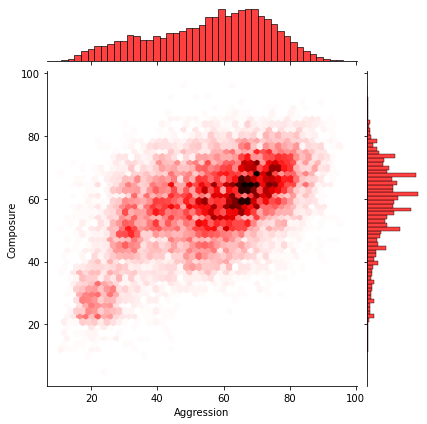

In [21]:
# Aggresion will opose Composure because it determines the ability of controlling their frustration

plt.figure(figsize=(15,8))
sns.jointplot(x="Aggression",y="Composure",data=df,kind="hex",color="red")

<Figure size 1080x576 with 0 Axes>

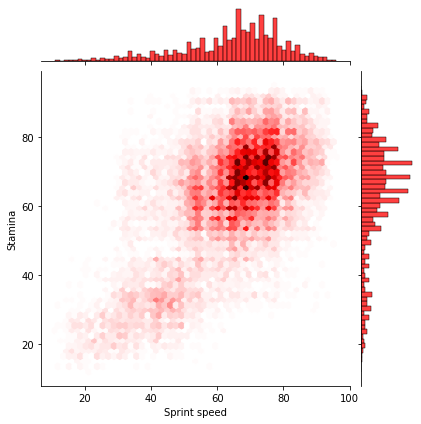

In [22]:
plt.figure(figsize=(15,8))
sns.jointplot(x="Sprint speed", y="Stamina", data=df,kind ="hex",color = 'red'); #comparing special attack and speed

<Figure size 1080x576 with 0 Axes>

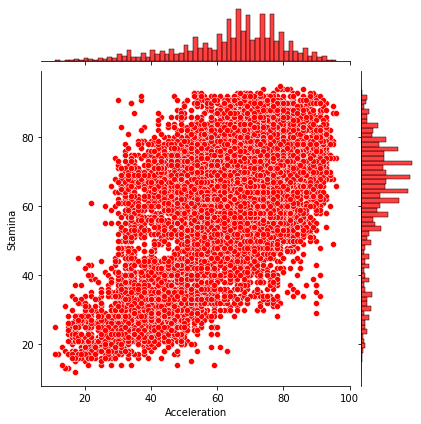

In [23]:
plt.figure(figsize=(15,8))
sns.jointplot(x="Acceleration",y="Stamina",data=df,color="red");

<Figure size 1080x576 with 0 Axes>

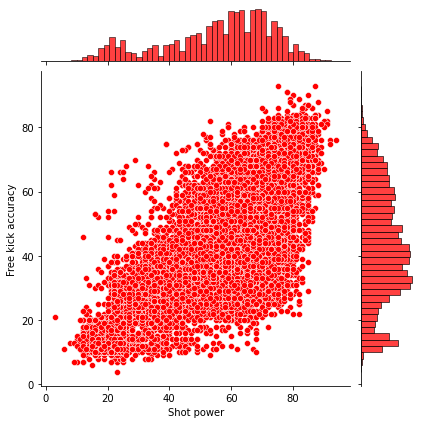

In [24]:
plt.figure(figsize=(15,8))
sns.jointplot(x="Shot power", y="Free kick accuracy", data=df,color = 'red'); #comparing special Defense and speed

<AxesSubplot:xlabel='Position', ylabel='Aggression'>

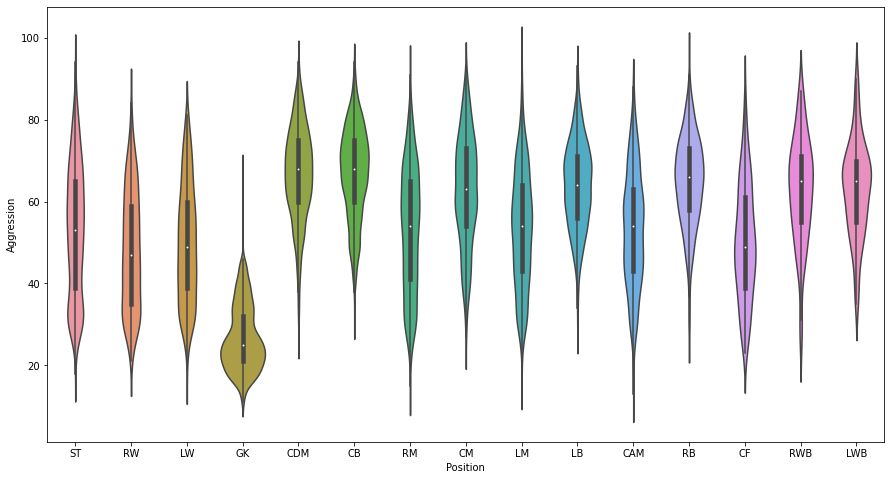

In [25]:
# position vs agression

plt.figure(figsize=(15,8))
sns.violinplot(x="Position",y="Aggression",data = df)

<AxesSubplot:xlabel='Position', ylabel='Composure'>

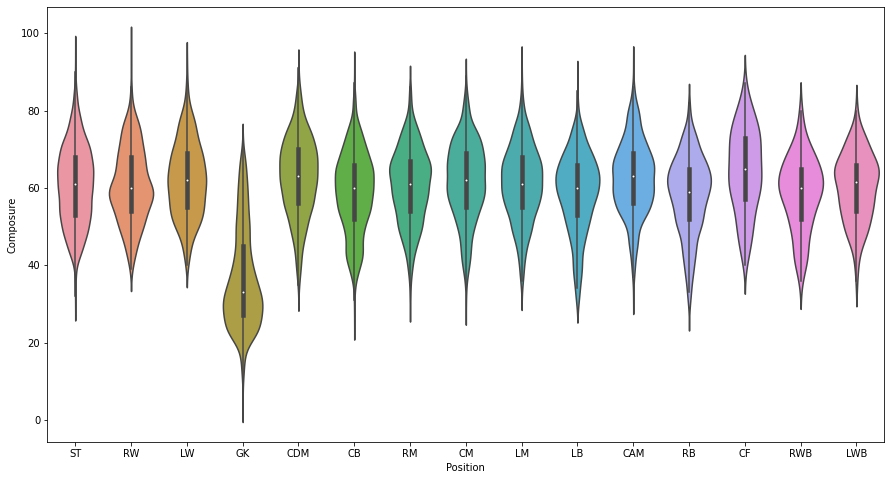

In [26]:
plt.figure(figsize=(15,8))
sns.violinplot(x="Position",y="Composure",data = df)

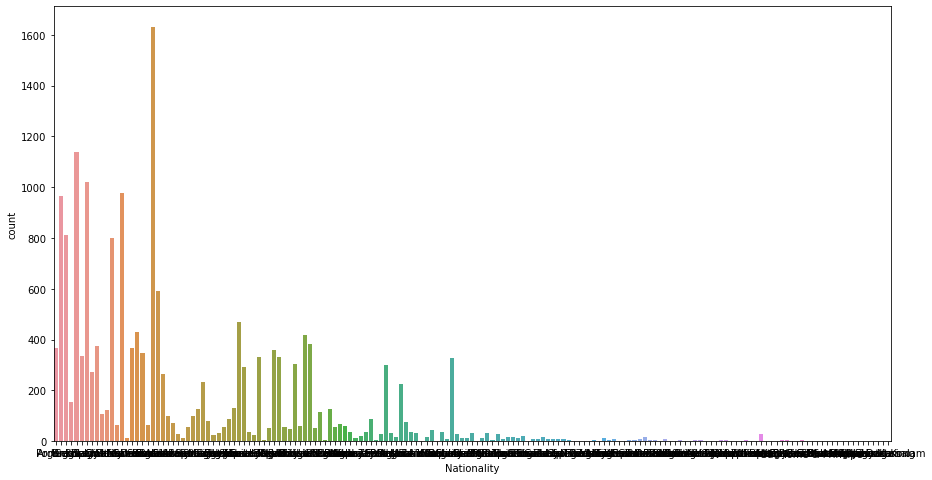

In [27]:
plt.figure(figsize=(15,8)) #checking the number of pokemons from each generation
sns.countplot(x='Nationality',data=df)
plt.show()

In [28]:
df[df['WageNum']>1000][['Name','Age','Nationality','Overall','Club','Value','Wage','WageNum','Position']].sort_values(by = 'WageNum',ascending = False).head(10) #top 5 pokemons with highest HP

,Name,Age,Nationality,Overall,Club,Value,Wage,WageNum,Position
0,Cristiano Ronaldo,32,Portugal,94,Real Madrid CF,€95.5M,€565K,565000.0,ST
1,L. Messi,30,Argentina,93,FC Barcelona,€105M,€565K,565000.0,RW
3,L. Suárez,30,Uruguay,92,FC Barcelona,€97M,€510K,510000.0,ST
15,G. Bale,27,Wales,89,Real Madrid CF,€69.5M,€370K,370000.0,RW
5,R. Lewandowski,28,Poland,91,FC Bayern Munich,€92M,€355K,355000.0,ST
8,T. Kroos,27,Germany,90,Real Madrid CF,€79M,€340K,340000.0,CDM
14,L. Modrić,31,Croatia,89,Real Madrid CF,€57M,€340K,340000.0,CDM
16,S. Agüero,29,Argentina,89,Manchester City,€66.5M,€325K,325000.0,ST
10,Sergio Ramos,31,Spain,90,Real Madrid CF,€52M,€310K,310000.0,CB
7,E. Hazard,26,Belgium,90,Chelsea,€90.5M,€295K,295000.0,LW


In [29]:
df[df['ValueNum']>1000][['Name','Age','Nationality','Overall','Club','Value','Wage','ValueNum','Position']].sort_values(by = 'ValueNum',ascending = False).head(10) #top 5 pokemons with highest HP

,Name,Age,Nationality,Overall,Club,Value,Wage,ValueNum,Position
2,Neymar,25,Brazil,92,Paris Saint-Germain,€123M,€280K,123000000.0,LW
1,L. Messi,30,Argentina,93,FC Barcelona,€105M,€565K,105000000.0,RW
3,L. Suárez,30,Uruguay,92,FC Barcelona,€97M,€510K,97000000.0,ST
0,Cristiano Ronaldo,32,Portugal,94,Real Madrid CF,€95.5M,€565K,95500000.0,ST
5,R. Lewandowski,28,Poland,91,FC Bayern Munich,€92M,€355K,92000000.0,ST
7,E. Hazard,26,Belgium,90,Chelsea,€90.5M,€295K,90500000.0,LW
11,K. De Bruyne,26,Belgium,89,Manchester City,€83M,€285K,83000000.0,RM
19,P. Dybala,23,Argentina,88,Juventus,€79M,€215K,79000000.0,ST
8,T. Kroos,27,Germany,90,Real Madrid CF,€79M,€340K,79000000.0,CDM
9,G. Higuaín,29,Argentina,90,Juventus,€77M,€275K,77000000.0,ST


In [30]:
df[df['Overall']>50][['Name','Age','Nationality','Overall','Club','Value','Wage','Position']].sort_values(by = 'Overall',ascending = False).head(10) #top 5 pokemons with highest HP

,Name,Age,Nationality,Overall,Club,Value,Wage,Position
0,Cristiano Ronaldo,32,Portugal,94,Real Madrid CF,€95.5M,€565K,ST
1,L. Messi,30,Argentina,93,FC Barcelona,€105M,€565K,RW
2,Neymar,25,Brazil,92,Paris Saint-Germain,€123M,€280K,LW
3,L. Suárez,30,Uruguay,92,FC Barcelona,€97M,€510K,ST
4,M. Neuer,31,Germany,92,FC Bayern Munich,€61M,€230K,GK
5,R. Lewandowski,28,Poland,91,FC Bayern Munich,€92M,€355K,ST
6,De Gea,26,Spain,90,Manchester United,€64.5M,€215K,GK
7,E. Hazard,26,Belgium,90,Chelsea,€90.5M,€295K,LW
8,T. Kroos,27,Germany,90,Real Madrid CF,€79M,€340K,CDM
9,G. Higuaín,29,Argentina,90,Juventus,€77M,€275K,ST


In [31]:
df[df['Age']>30][['Name','Age','Nationality','Overall','Club','Value','Wage','Position']].sort_values(by = 'Age',ascending = False).head(10) #top 5 pokemons with highest HP

,Name,Age,Nationality,Overall,Club,Value,Wage,Position
17977,B. Richardson,47,England,46,Wycombe Wanderers,€0,€1K,GK
5314,E. El Hadary,44,Egypt,70,Al Taawoun,€120K,€7K,GK
4839,O. Pérez,44,Mexico,71,Pachuca,€160K,€9K,GK
16834,J. Walker,43,England,55,Lincoln City,€10K,€1K,GK
16696,D. Coyne,43,Wales,55,Shrewsbury,€10K,€1K,GK
6654,Quim,41,Portugal,69,CD Aves,€70K,€3K,GK
16121,C. Day,41,England,57,Stevenage,€10K,€1K,GK
7727,K. Wæhler,41,Norway,67,Sogndal,€0,€2K,CB
9395,L. Butrón,40,Peru,66,No Club,€0,€0,GK
13863,M. Brown,40,England,61,Port Vale,€0,€2K,CDM


<AxesSubplot:xlabel='Position', ylabel='WageNum'>

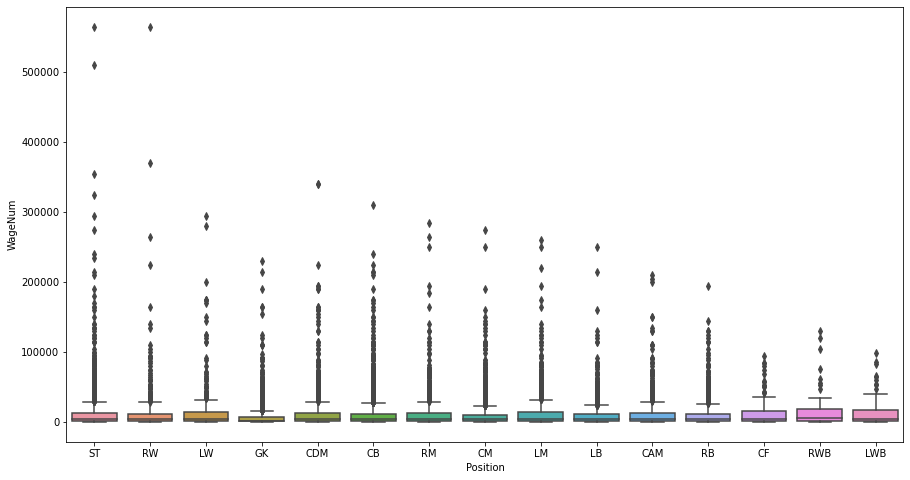

In [32]:
plt.figure(figsize=(15,8)) #comparing total scores of different types in Type 1
sns.boxplot(x = df['Position'],y = df['WageNum'])

<AxesSubplot:xlabel='Position', ylabel='ValueNum'>

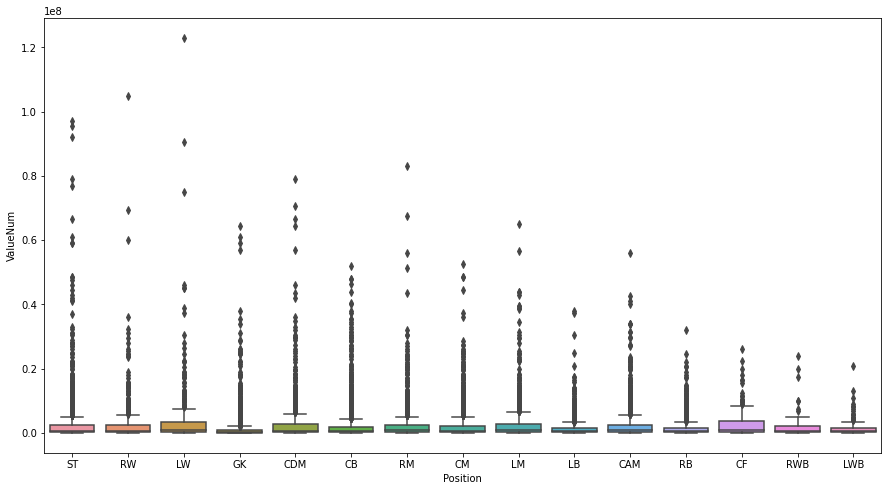

In [33]:
plt.figure(figsize=(15,8)) #comparing total scores of different types in Type 2
sns.boxplot(x = df['Position'],y = df['ValueNum'])

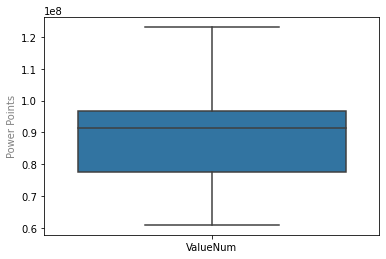

In [34]:
legend = df[df['Overall']>50].sort_values(by = 'Overall',ascending = False).head(10) #comparing attributes of 10 best players in the world
legend = legend[['ValueNum']]
# fig = plt.figure(figsize= (15,8))
sns.boxplot(data=legend)
plt.ylabel("Power Points",color="grey")
plt.show()

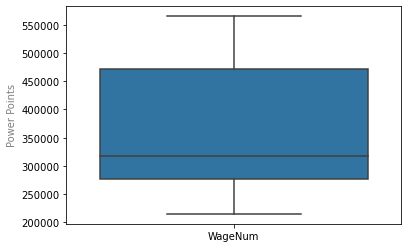

In [35]:
legend = df[df['Overall']>50].sort_values(by = 'Overall',ascending = False).head(10) #comparing attributes of 10 best players in the world
legend = legend[['WageNum']]
# fig = plt.figure(figsize= (15,8))
sns.boxplot(data=legend)
plt.ylabel("Power Points",color="grey")
plt.show()

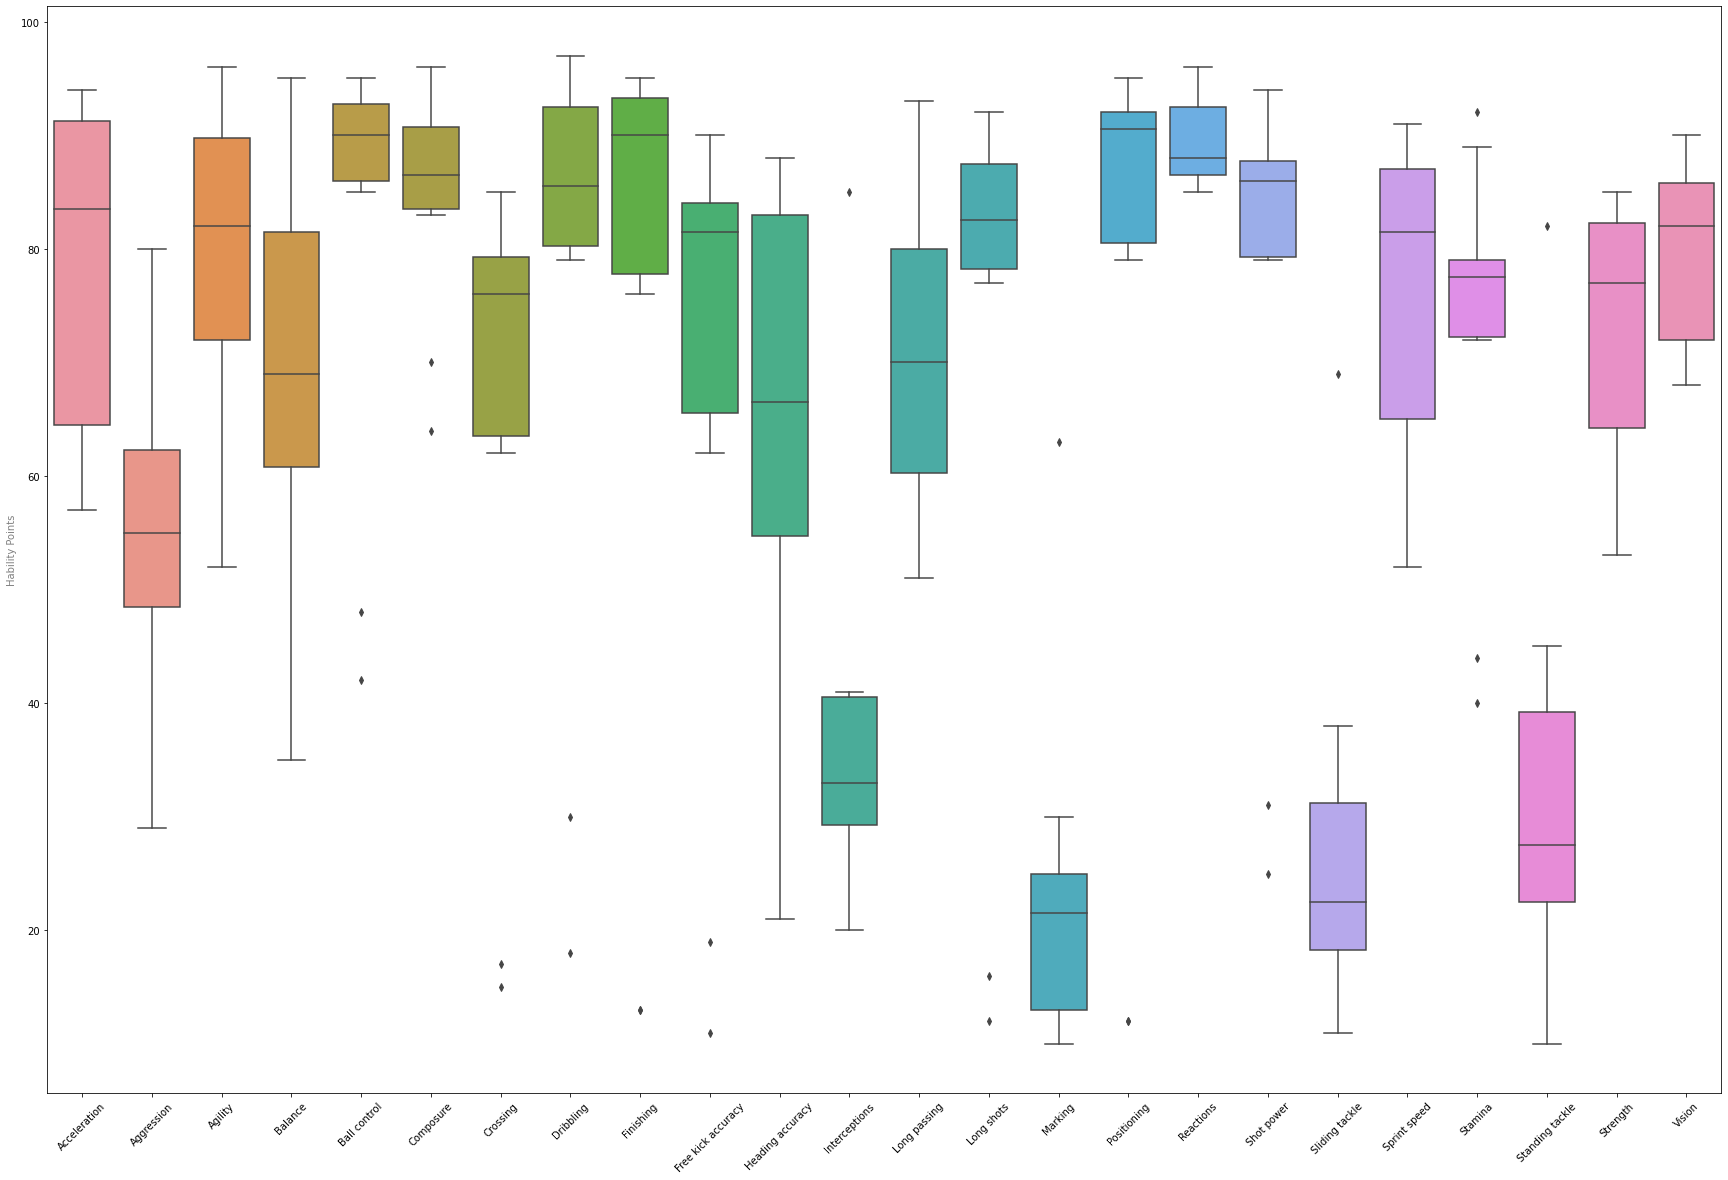

In [37]:
legend = df[df['Overall']>50].sort_values(by = 'Overall',ascending = False).head(10) #comparing attributes of 10 best players in the world
legend = legend[['Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing',  'Dribbling',
       'Finishing', 'Free kick accuracy','Heading accuracy',
       'Interceptions', 'Long passing', 'Long shots', 'Marking',
       'Positioning', 'Reactions',  'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision']]

fig = plt.figure(figsize= (30,20))
sns.boxplot(data=legend)
plt.ylabel("Hability Points",color="grey")
plt.xticks(rotation = 45)

plt.show()

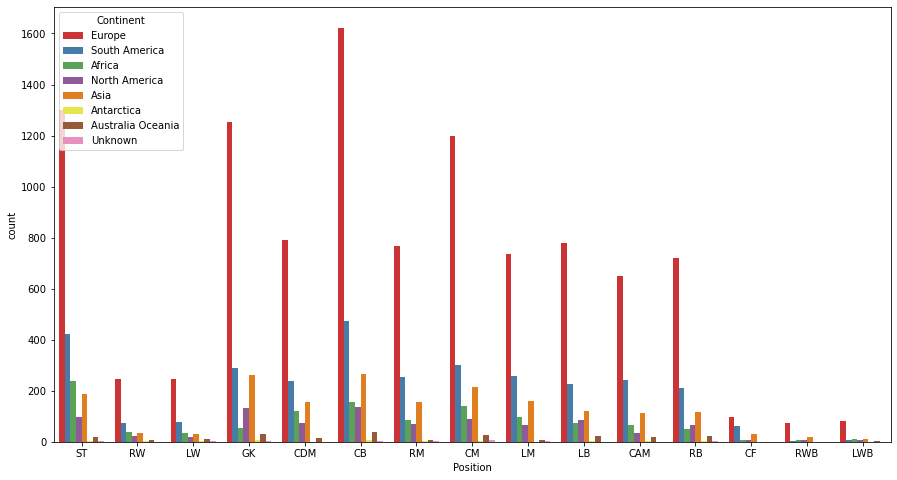

In [39]:
plt.figure(figsize=(15,8)) #distribution of legends according to their generations
plot = sns.countplot(x='Position',data=df,hue='Continent',palette="Set1")

In [40]:
def compare(p1,p2,c): #method to compare any attributes of two pokemons
    comp = df[(df.Name == p1) | (df.Name ==p2)]
    sns.barplot(x='Name',y=c,data=comp,palette="Set1")

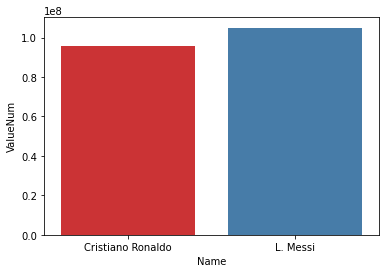

In [41]:
compare('Cristiano Ronaldo','L. Messi','ValueNum')

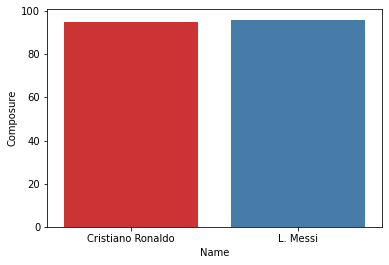

In [42]:
compare('Cristiano Ronaldo','L. Messi','Composure')

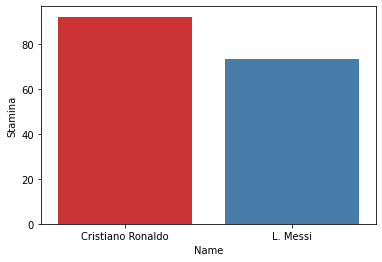

In [43]:
compare('Cristiano Ronaldo','L. Messi','Stamina')

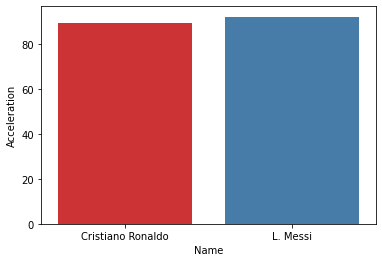

In [44]:
compare('Cristiano Ronaldo','L. Messi','Acceleration')

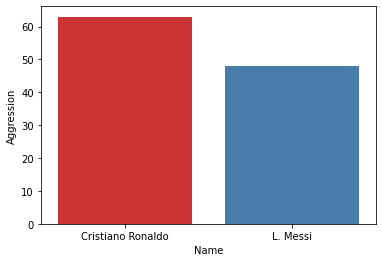

In [45]:
compare('Cristiano Ronaldo','L. Messi','Aggression')

In [46]:
def PokeFight(p1,p2,p3,p4,p5): #method to compare overall power of any 5 pokemons of your choice
    x = df[df["Name"] == p1]
    trace1 = go.Scatterpolar(
      r = [x['Finishing'].values[0],x['Agility'].values[0],x['Balance'].values[0],x['Dribbling'].values[0],x['Aggression'].values[0],x['Stamina'].values[0],x["Finishing"].values[0]],
      theta = ['Finishing','Agility','Balance','Dribbling','SFinishing','Stamina'],
      fill = 'toself',
      name = p1
    )
    x = df[df["Name"] == p2]
    trace2 = go.Scatterpolar(
      r = [x['Finishing'].values[0],x['Agility'].values[0],x['Balance'].values[0],x['Dribbling'].values[0],x['Aggression'].values[0],x['Stamina'].values[0],x["Finishing"].values[0]],
      theta = ['Finishing','Agility','Balance','Dribbling','SFinishing','Stamina'],
      fill = 'toself',
      name = p2
    )
    x = df[df["Name"] == p3]
    trace3 = go.Scatterpolar(
      r = [x['Finishing'].values[0],x['Agility'].values[0],x['Balance'].values[0],x['Dribbling'].values[0],x['Aggression'].values[0],x['Stamina'].values[0],x["Finishing"].values[0]],
      theta = ['Finishing','Agility','Balance','Dribbling','SFinishing','Stamina'],
      fill = 'toself',
      name = p3
    )
    x = df[df["Name"] == p4]
    trace4 = go.Scatterpolar(
      r = [x['Finishing'].values[0],x['Agility'].values[0],x['Balance'].values[0],x['Dribbling'].values[0],x['Aggression'].values[0],x['Stamina'].values[0],x["Finishing"].values[0]],
      theta = ['Finishing','Agility','Balance','Dribbling','SFinishing','Stamina'],
      fill = 'toself',
      name = p4
    )
    x = df[df["Name"] == p5]
    trace5 = go.Scatterpolar(
      r = [x['Finishing'].values[0],x['Agility'].values[0],x['Balance'].values[0],x['Dribbling'].values[0],x['Aggression'].values[0],x['Stamina'].values[0],x["Finishing"].values[0]],
      theta = ['Finishing','Agility','Balance','Dribbling','SFinishing','Stamina'],
      fill = 'toself',
      name = p5
    )
    
    layout = go.Layout(
      xaxis=dict(
            domain=[0, 0.45]
        ),
        yaxis=dict(
            domain=[0, 0.45]
        ),
        xaxis2=dict(
            domain=[0.55, 1]
        ),
        xaxis3=dict(
            domain=[0, 0.45],
            anchor='y3'
        ),
        xaxis4=dict(
            domain=[0.55, 1],
            anchor='y4'
        ),
        yaxis2=dict(
            domain=[0, 0.45],
            anchor='x2'
        ),
        yaxis4=dict(
            domain=[0.55, 1],
            anchor='x4'
        ),
        
      showlegend = True,
      title = "Players' Performance"
    )

    data = [trace1, trace2, trace3,trace4,trace5]
    fig = go.Figure(data=data, layout=layout)

    iplot(fig, filename = "Players stats")
    

In [47]:
PokeFight("Cristiano Ronaldo","L. Messi","Neymar","L. Suárez","M. Neuer") #comparing the overall attributes of the pokemon

This concludes my EDA on the Pokemon Data set. I will be applying some classification algorithms on this in future.

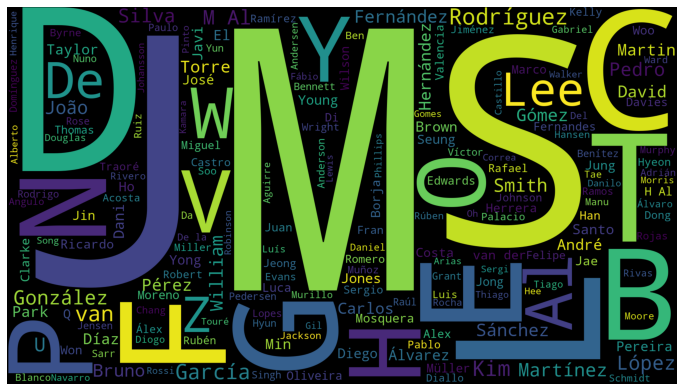

In [48]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

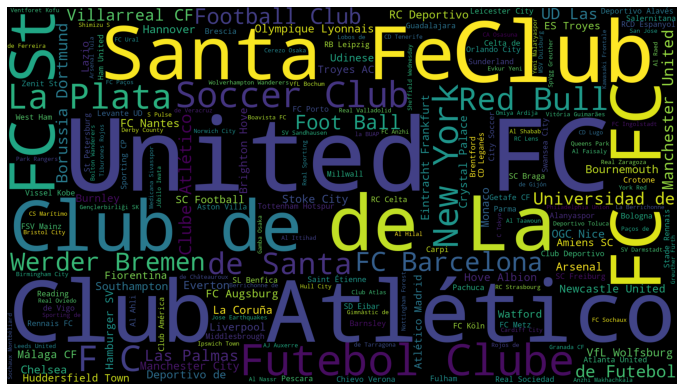

In [49]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df['Club']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 9.9 - Outro

Original Notebook
- https://www.kaggle.com/code/aayushmishra1512/pokemon-eda-which-pokemon-is-the-best/data

FIFA Encyclopedia
- https://www.fifplay.com/encyclopedia/ 

A few other FIFA Analisys 
- https://www.kaggle.com/code/oliversinn/fifa-18-visualisation-clustering-ml/report
- https://www.kaggle.com/code/skalskip/fifa-18-data-exploration-and-d3-js-visualization
- https://www.kaggle.com/datasets/thec03u5/fifa-18-demo-player-dataset?datasetId=2547&sortBy=voteCount&language=Python
